In [64]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [65]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [66]:
conv_base.trainable = True
set_trainable = False
for layers in conv_base.layers:
    if layers.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layers.trainable = True
    else:
        layers.trainable = False

In [67]:
print(len(model.trainable_weights))

10


In [68]:
import os
base_dir = '/Users/l/Documents/MachineLearning/keras-playground/Substations'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [70]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=(0.2),
    zoom_range=(0.2),
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)



Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [72]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=30, 
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/30
20/20 [==============================] - 290s 14s/step - loss: 0.5235 - acc: 0.7325 - val_loss: 0.3191 - val_acc: 0.8950
Epoch 2/30
20/20 [==============================] - 247s 12s/step - loss: 0.2814 - acc: 0.9150 - val_loss: 0.2148 - val_acc: 0.9300
Epoch 3/30
20/20 [==============================] - 311s 16s/step - loss: 0.1830 - acc: 0.9525 - val_loss: 0.1972 - val_acc: 0.9300
Epoch 4/30
20/20 [==============================] - 264s 13s/step - loss: 0.1898 - acc: 0.9450 - val_loss: 0.1891 - val_acc: 0.9400
Epoch 5/30
20/20 [==============================] - 252s 13s/step - loss: 0.1355 - acc: 0.9600 - val_loss: 0.1925 - val_acc: 0.9350
Epoch 6/30
20/20 [==============================] - 241s 12s/step - loss: 0.1524 - acc: 0.9475 - val_loss: 0.1904 - val_acc: 0.9350
Epoch 7/30
20/20 [==============================] - 253s 13s/step - loss: 0.1115 - acc: 0.9675 - val_loss: 0.1977 - val_acc: 0.9300
Epoch 8/30
20/20 [==============================] - 249s 12s/step - loss: 0.

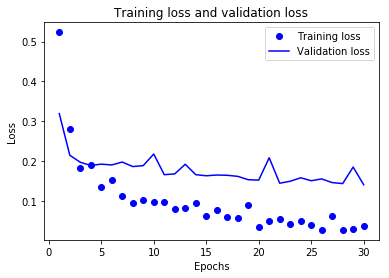

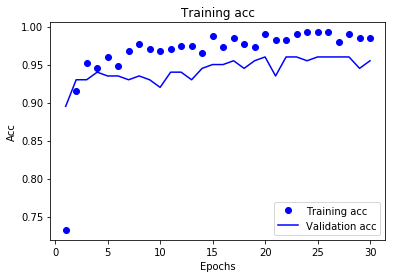

In [74]:
history_dict = model.history.history
history_dict.keys()

import matplotlib.pyplot as plt

train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) +1)

plt.plot(epochs, train_loss, 'bo', label="Training loss")
plt.plot(epochs, validation_loss, 'b', label="Validation loss")
plt.title('Training loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_acc= history_dict['acc']
validation_acc= history_dict['val_acc']
epochs = range(1, len(train_acc) +1)

plt.plot(epochs, train_acc, 'bo', label="Training acc")
plt.plot(epochs, validation_acc, 'b', label="Validation acc")
plt.title('Training acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [80]:
img_path = "/Users/l/Documents/MachineLearning/keras-playground/Substations/test/substations/877-35kV芒部变电站-104.8561521-27.6268726.jpg"

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

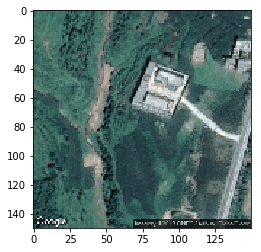

[[0.99974066]]
变电站


In [81]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
prediction = model.predict(img_tensor)
print(prediction)
if prediction < 0.5 : 
    print('others')
else:
    print('变电站')

In [82]:
model.save('Vgg_version1.h5')

In [83]:
evaluation = model.evaluate_generator(
    test_generator,
    steps=10
)

In [85]:
evaluation

[0.11909035976277664, 0.9549999892711639]